### **Práctica 2 - Machine Learning III**

**Objetivo**: 
1. Analizar el conjunto de datos. 
2. Crear un sistema de recomendación de artistas para usuarios.
   
**Entregar**: Este cuaderno de jupyter con el trabajo hecho y comentado.

**Datos**: 

Los datos suministrados ya han sido procesados, limpiados y estructurados para simplificar su manejo y análisis. 

Para aquellos interesados en explorar y manipular el conjunto de datos original, así como entender la estructura, podéis descargarlo directamente aquí: 

https://grouplens.org/datasets/hetrec-2011/.

In [2]:
import pandas as pd 

artists = pd.read_csv('./hetrec2011-lastfm-2k/artists-v2.dat', header=0, sep='\t')
user_tag_artist = pd.read_csv('./hetrec2011-lastfm-2k/user_taggedartists.dat', header=0, sep='\t')
tags = pd.read_csv('hetrec2011-lastfm-2k/tags.dat', header=0, sep='\t', encoding='latin-1')
users = pd.read_csv('hetrec2011-lastfm-2k/user_artists.dat',header=0, sep='\t')


In [3]:
artists.head()

,artistID,name,freq,listeners
0,89,Lady Gaga,611,3798959
1,289,Britney Spears,522,3243214
2,288,Rihanna,484,4542147
3,227,The Beatles,480,3658694
4,300,Katy Perry,473,3721531


In [4]:
users.head()

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


In [7]:

print("\nInformación de etiquetas:")
print(tags.head())



Información de etiquetas:
   tagID           tagValue
0      1              metal
1      2  alternative metal
2      3          goth rock
3      4        black metal
4      5        death metal


In [6]:
print("\nInformación de etiquetas de usuario para artistas:")
print(user_tag_artist.head())


Información de etiquetas de usuario para artistas:
   userID  artistID  tagID  day  month  year
0       2        52     13    1      4  2009
1       2        52     15    1      4  2009
2       2        52     18    1      4  2009
3       2        52     21    1      4  2009
4       2        52     41    1      4  2009


In [10]:
# Obtener los artistas más populares basados en el número de usuarios que los han escuchado
popular_artists = users.groupby('artistID').size().sort_values(ascending=False)[:10]
print("Artistas más populares:")
print(artists.loc[popular_artists.index][['name']])


Artistas más populares:
                       name
artistID                   
89              Demi Lovato
289            The National
288            3 Doors Down
227       Breaking Benjamin
300             Damien Rice
67                Daft Punk
333                    Enya
292               Van Halen
190            All Time Low
498            Jason Derülo


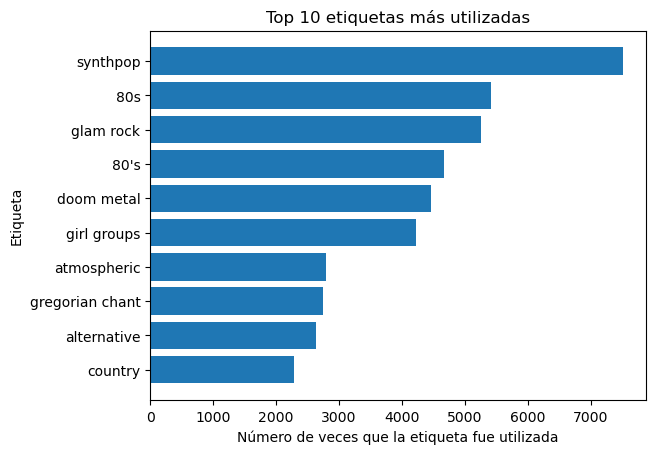

In [11]:
# Contar la frecuencia de las etiquetas
tag_counts = user_tag_artist['tagID'].value_counts().sort_values(ascending=False)[:10]
top_tags = tags.loc[tag_counts.index]['tagValue']

plt.barh(top_tags, tag_counts)
plt.xlabel('Número de veces que la etiqueta fue utilizada')
plt.ylabel('Etiqueta')
plt.title('Top 10 etiquetas más utilizadas')
plt.gca().invert_yaxis()
plt.show()
